In [1]:
import matplotlib
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
plots.style.use('fivethirtyeight')

# Normal Distributions

## Standard Units ##

In [2]:
# Read in births data set
births = Table.read_table('data/baby.csv')
births.show(3)

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True


In [3]:
# A function to convert an array to standard units
def standard_units(x):
    """Convert array x to standard units."""
    return (x - np.mean(x)) / np.std(x)

In [4]:
# Create an array to hold the maternal ages
ages = births.column('Maternal Age')
ages

array([27, 33, 28, ..., 30, 21, 38])

In [5]:
# Convert the maternal ages to standard units
ages_standard_units = standard_units(ages)
print(ages_standard_units)

[-0.03925456  0.99249577  0.13270383 ...  0.47662061 -1.07100488
  1.85228771]


In [6]:
# Verify that the mean is 0 and standard deviation is 1
np.mean(ages_standard_units), np.std(ages_standard_units)

(-7.868020072300939e-17, 1.0)

In [7]:
# Create a table with both original and standard units
both = Table().with_columns('Age in Years', ages, 'Age in Standard Units', ages_standard_units)
both

Age in Years,Age in Standard Units
27,-0.0392546
33,0.992496
28,0.132704
23,-0.727088
25,-0.383171
33,0.992496
23,-0.727088
25,-0.383171
30,0.476621
27,-0.0392546


In [8]:
# Display average and and standard deviation in original units
np.mean(ages), np.std(ages)

(27.228279386712096, 5.815360404190897)

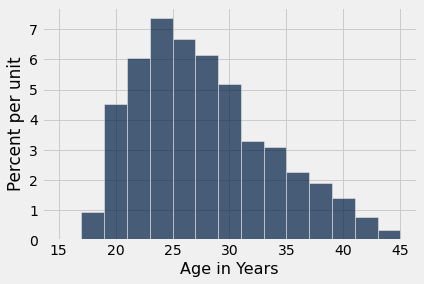

In [9]:
both.hist('Age in Years', bins = np.arange(15, 46, 2))

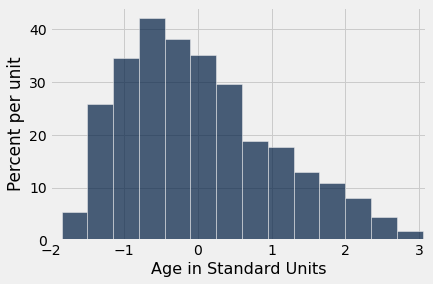

In [10]:
# Confirm distributions are the same shape in standard units
both.hist('Age in Standard Units', bins = np.arange(-2.2, 3.4, 0.35))
plots.xlim(-2, 3.1);

## The SD and Bell Shaped Curves

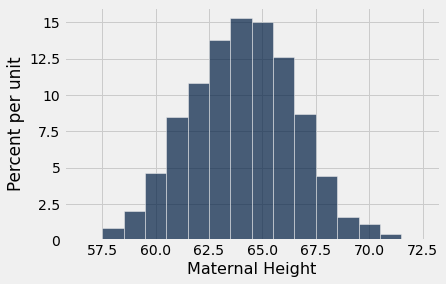

In [11]:
births.hist('Maternal Height', bins = np.arange(56.5, 72.6, 1))

In [12]:
# Compute the mean and standard deviation
heights = births.column('Maternal Height')
np.mean(heights), np.std(heights)

(64.04940374787053, 2.5250254409674375)

In [13]:
# Estimate the inflection points
np.mean(heights) + np.std(heights), np.mean(heights) - np.std(heights)

(66.57442918883797, 61.52437830690309)

## Central Limit Theorem ##

In [14]:
# Read in United data
united = Table.read_table('data/united.csv')
united_bins = np.arange(-20, 300, 10)
united

Date,Flight Number,Destination,Delay
6/1/15,73,HNL,257
6/1/15,217,EWR,28
6/1/15,237,STL,-3
6/1/15,250,SAN,0
6/1/15,267,PHL,64
6/1/15,273,SEA,-6
6/1/15,278,SEA,-8
6/1/15,292,EWR,12
6/1/15,300,HNL,20
6/1/15,317,IND,-10


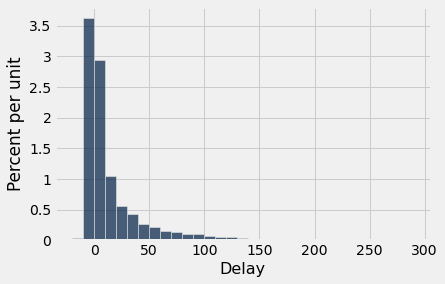

In [15]:
# Inspect histogram of the Delay column
united.hist('Delay', bins=united_bins)

In [16]:
# Determine mean and sd of the Delay column
delays = united.column('Delay')
delay_mean = np.mean(delays)
delay_sd = np.std(delays)
delay_mean, delay_sd

(16.658155515370705, 39.480199851609314)

In [17]:
def one_sample_mean(sample_size):
    """ Takes a sample from the population of flights and computes its mean"""
    sampled_flights = united.sample(sample_size)
    return np.mean(sampled_flights.column('Delay'))

In [20]:
one_sample_mean(100)

14.9

In [21]:
def ten_thousand_sample_means(sample_size):
    means = make_array()
    for i in np.arange(10000):
        mean = one_sample_mean(sample_size)
        means = np.append(means, mean)
    return means
#take a sample size of 100, ten thousand times

In [22]:
# Create an array with 10000 sample means of the Delays
sample_means_100 = ten_thousand_sample_means(100)

In [23]:
# Inspect the array of sample means
sample_means_100

array([18.81, 13.11, 17.37, ..., 15.75, 16.63, 16.12])

In [24]:
# Verify there are 10000 sample means
len(sample_means_100)

10000

Population Average: 16.658155515370705


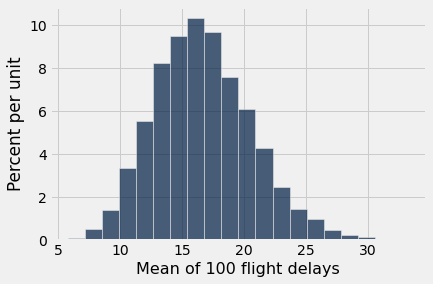

In [25]:
# Inspect the histogram of the 10,000 samples of flight delays
Table().with_column('Mean of 100 flight delays', sample_means_100).hist(bins=20)
print('Population Average:', delay_mean)

Population Average: 16.658155515370705


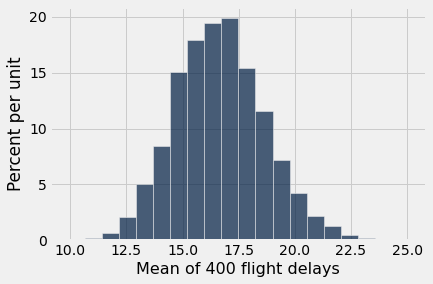

In [26]:
# How does increasing the sample size impact the distribution?
sample_means_400 = ten_thousand_sample_means(400)
Table().with_column('Mean of 400 flight delays', sample_means_400).hist(bins=20)
print('Population Average:', delay_mean)

Population Average: 16.658155515370705


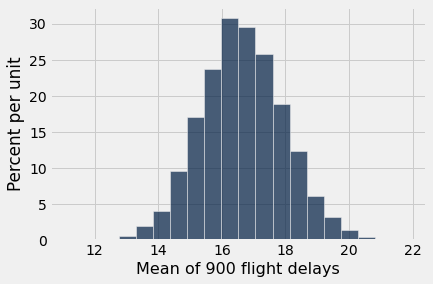

In [27]:
# How does increasing the sample size impact the distribution?
sample_means_900 = ten_thousand_sample_means(900)
Table().with_column('Mean of 900 flight delays', sample_means_900).hist(bins=20)
print('Population Average:', delay_mean)

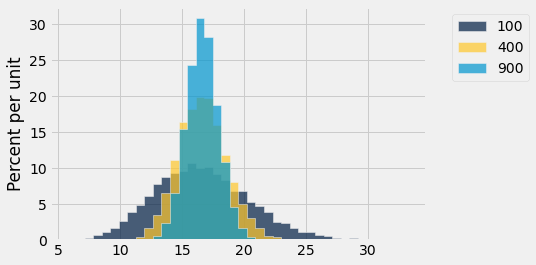

In [28]:
Table().with_columns('100', sample_means_100, '400',sample_means_400, '900', sample_means_900).hist(bins=40)